In [2]:
import pickle 
import numpy as np 
from ecog_utils import erp_util
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})#, 'font.sans-serif': 'Arial'})
plt.rcParams.update({'font.sans-serif':'Arial'})
import matplotlib as mpl
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
plt.rcParams['svg.fonttype'] = 'none'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
source_path = './source_data/ED_5/'

In [3]:
d = np.load(f'{source_path}/sample_22_conn.npz')
smoothed = d['smoothed']
sample_conn = d['sample_conn']#,Ks=Ks,inertias=inertias)
lags = d['lags']

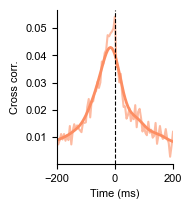

In [4]:
from scipy.ndimage import gaussian_filter1d
import seaborn as sns
import matplotlib.pyplot as plt
col = sns.color_palette('Set2')[1]
fig,ax = plt.subplots(figsize=(1.5,2))
ax.plot(lags,sample_conn,color=col,alpha=0.6)
ax.plot(lags,smoothed,color=col,linewidth=2)
ax.set(xlabel='Time (ms)',ylabel='Cross corr.',xlim=[-200,200])
ax.axvline(0,color='k',linestyle='--',linewidth=0.8)
np.savetxt(f'./statistical_source/ED5/left.txt',
          sample_conn)

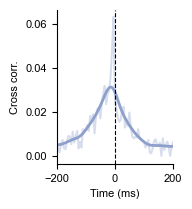

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# NOTE: seaborn not required anymore because we saved the color

npz_path = f"{source_path}/sample33_conn_minimal.npz"
D = np.load(npz_path, allow_pickle=True)

lags = D["lags"]
sample_conn = D["sample_conn"]
sigma = float(D["sigma"])
col = tuple(D["col"])   # matplotlib wants tuple
idx = int(D["idx"])

smoothed = gaussian_filter1d(sample_conn, sigma)

fig, ax = plt.subplots(figsize=(1.5, 2))
ax.plot(lags, sample_conn, color=col, alpha=0.35)
ax.plot(lags, smoothed, color=col, linewidth=2)

ax.set(xlabel="Time (ms)", ylabel="Cross corr.", xlim=[-200, 200])
ax.axvline(0, color="k", linestyle="--", linewidth=0.8)
np.savetxt(f'./statistical_source/ED5/center.txt',
          sample_conn)

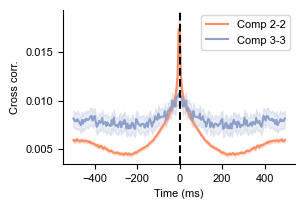

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

npz_path = f"{source_path}/summary_conn_supp_minimal.npz"
D = np.load(npz_path, allow_pickle=True)

conn22 = D["conn22"]
conn33 = D["conn33"]
lags = D["lags"]
cols = D["cols"]
labels = list(D["labels"])

sigs = [conn22, conn33]

fig, ax = plt.subplots(figsize=(3, 2))
avgs = []
for sig, col, lab in zip(sigs, cols, labels):
    avg = sig.mean(axis=0)
    error = sem(sig, axis=0)
    ax.plot(lags, avg, color=tuple(col), label=lab)
    ax.fill_between(lags, avg - error, avg + error, alpha=0.2, color=tuple(col), label="_no")
    avgs.append(avg)
ax.axvline(0, color="k", linestyle="--")
ax.legend()
ax.set(xlabel="Time (ms)", ylabel="Cross corr.")
np.savetxt(f'./statistical_source/ED5/right.txt',
          np.array(avgs))